In [1]:
import salem
import cleo
import pandas as pd
import geopandas as gpd
import xarray as xr
import shapely.geometry as shpg
import matplotlib.pyplot as plt  
import numpy as np 
import cartopy 
import cartopy.crs as ccrs
from glob import glob
%matplotlib inline
# The commands below are not important
import warnings
warnings.filterwarnings('ignore')

In [2]:
f = '/home/mowglie/Downloads/ERA-Test-NA.nc'

In [3]:
ds = xr.open_dataset(f)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 55, level: 4, longitude: 95, time: 450)
Coordinates:
  * longitude  (longitude) float32 229.5 230.25 231.0 231.75 232.5 233.25 ...
  * latitude   (latitude) float32 70.5 69.75 69.0 68.25 67.5 66.75 66.0 ...
  * level      (level) int32 500 700 800 900
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    z          (time, level, latitude, longitude) float64 5.202e+04 ...
Attributes:
    Conventions: CF-1.6
    history: 2016-09-14 13:24:52 GMT by grib_to_netcdf-1.16.0: grib_to_netcdf /data/data01/scratch/_mars-atls04-95e2cf679cd58ee9b4db4dd119a05a8d-J8rGxQ.grib -o /data/data01/scratch/_grib2netcdf-atls12-95e2cf679cd58ee9b4db4dd119a05a8d-BZqV9w.nc -utime

In [5]:
ds['z'].mean()

<xarray.DataArray 'z' ()>
array(27972.863686786153)

In [6]:
z_t_avg = ds['z'].mean(dim='time')
z_t_avg

<xarray.DataArray 'z' (level: 4, latitude: 55, longitude: 95)>
array([[[ 52382.69555899,  52373.62863216,  52363.803242  , ...,
          51536.66955138,  51552.34965499,  51568.91116917],
        [ 52469.38895568,  52461.14283161,  52451.97373735, ...,
          51565.43401311,  51581.67690343,  51598.17607816],
        [ 52558.31445104,  52550.46487516,  52541.45509282, ...,
          51593.10407115,  51610.14871608,  51627.45310872],
        ..., 
        [ 56907.46608615,  56902.72309291,  56897.44675103, ...,
          57065.19701903,  57070.57206504,  57075.65446196],
        [ 56961.26503246,  56956.96014703,  56952.01974553, ...,
          57136.77483047,  57141.06759434,  57145.09022059],
        [ 57010.38332499,  57006.21870332,  57001.82550367, ...,
          57201.5091555 ,  57204.97592165,  57208.11540567]],

       [[ 28146.33777925,  28141.13070343,  28135.33313448, ...,
          27511.99230451,  27521.39690337,  27531.53225913],
        [ 28194.1400167 ,  28189.587505

In [7]:
z_t_avg_500 = z_t_avg.sel(level=500)
z_t_avg_500

<xarray.DataArray 'z' (latitude: 55, longitude: 95)>
array([[ 52382.69555899,  52373.62863216,  52363.803242  , ...,
         51536.66955138,  51552.34965499,  51568.91116917],
       [ 52469.38895568,  52461.14283161,  52451.97373735, ...,
         51565.43401311,  51581.67690343,  51598.17607816],
       [ 52558.31445104,  52550.46487516,  52541.45509282, ...,
         51593.10407115,  51610.14871608,  51627.45310872],
       ..., 
       [ 56907.46608615,  56902.72309291,  56897.44675103, ...,
         57065.19701903,  57070.57206504,  57075.65446196],
       [ 56961.26503246,  56956.96014703,  56952.01974553, ...,
         57136.77483047,  57141.06759434,  57145.09022059],
       [ 57010.38332499,  57006.21870332,  57001.82550367, ...,
         57201.5091555 ,  57204.97592165,  57208.11540567]])
Coordinates:
  * longitude  (longitude) float32 229.5 230.25 231.0 231.75 232.5 233.25 ...
  * latitude   (latitude) float32 70.5 69.75 69.0 68.25 67.5 66.75 66.0 ...
    level      int32 5

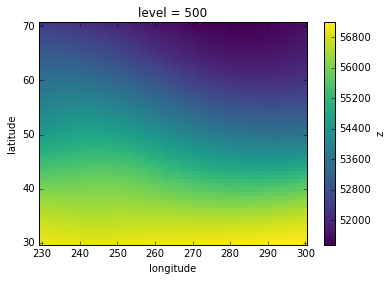

In [8]:
z_t_avg_500.plot();

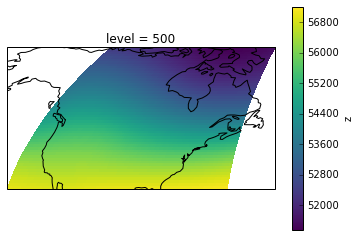

In [9]:
# Define the map projection.
ax = plt.axes(projection=ccrs.Robinson())
# ax is an empty plot. We now plot the variable t2_avg onto ax
z_t_avg_500.plot(ax=ax, transform=ccrs.PlateCarree()) 
# The keywords "transform" are projection details 
ax.coastlines();  # Add coastlines to the plot

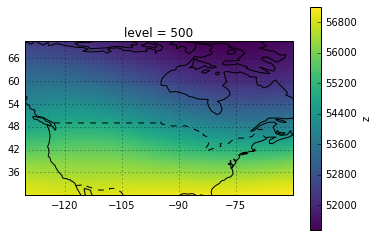

In [10]:
# Define the map projection.
ax = plt.axes(projection=ccrs.PlateCarree())
# ax is an empty plot. We now plot the variable t2_avg onto ax
z_t_avg_500.plot(ax=ax, transform=ccrs.PlateCarree()) 
# The keywords "transform" are projection details 
ax.coastlines();  # Add coastlines to the plot
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');